In [6]:
import numpy as np
import os
import rasterio
import tensorflow as tf
import matplotlib.pyplot as plt


path = "A:/STUDIUM/05_Herbstsemester25/PA2/data/aerial/training_data"
files = [os.path.join(path, f) for f in os.listdir(path)]

In [23]:
snip_size=1024
stride=512

snips = []
for file in files[0:1]:
    with rasterio.open(file) as src:
        image = src.read().transpose((1, 2, 0))

        if image.shape[-1] != 4:
            print(f"not good: image has {image.shape[-1]} channels")

        image_array = image.astype(np.float32)
    img_height, img_width, _ = image_array.shape
    for y in range(0, img_height - snip_size + 1, stride):
        for x in range(0, img_width - snip_size + 1, stride):
            snip = image_array[y:y + snip_size, x:x + snip_size]
            snips.append(snip)
print(snips[0].shape)  

(1024, 1024, 4)


In [ ]:
#print(snips[0])

In [ ]:

test = snips[0].numpy()[:,:,0:3]
min_val = np.min(test)
max_val = np.max(test)  

if max_val > min_val:
    test = (test - min_val) / (max_val - min_val)


plt.imshow(test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19273508..29.704044].


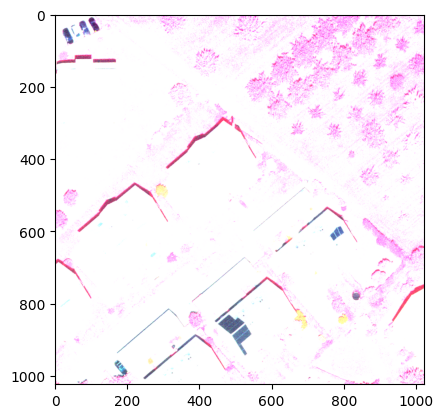

In [32]:
all_pixels = np.concatenate([snip.reshape(-1, snip.shape[-1]) for snip in snips], axis=0)
mean = np.mean(all_pixels, axis=0)
std = np.std(all_pixels, axis=0)
# avoid division by zero
std_safe = np.where(std == 0, 1.0, std).astype(np.float32)
normalized_snips = [(snip - mean) / std_safe for snip in snips]

plt.imshow(normalized_snips[0][:,:,1:4])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0215739..12.484582].


-0.021573948 13.484582


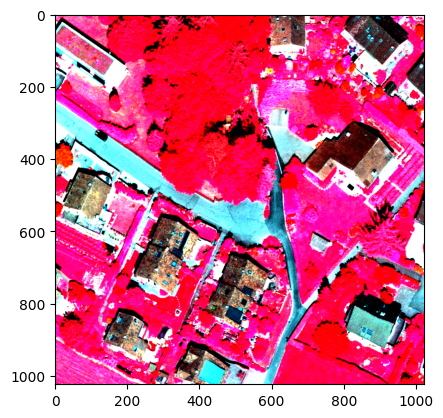

In [57]:
print(np.min(normalized_snips[100][:,:,0:3]), np.max(normalized_snips[100][:,:,0:3]))
plt.imshow(normalized_snips[100][:,:,0:3]-1)
plt.show()

In [59]:
mask_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith("mask.tif")]

snips = []
for file in mask_files:
    with rasterio.open(file) as src:
        mask = src.read().transpose((1, 2, 0))
        print(mask.shape)
        print(np.unique(mask))



(22404, 10496, 1)
[0 1 2 3 4 5]
(15919, 10496, 1)
[0 1 2 3 4 5]
(22331, 10240, 1)
[0 1 2 3 4 5]
(13581, 10240, 1)
[0 1 2 3 4 5]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3061745990346185..12.922248564704816].


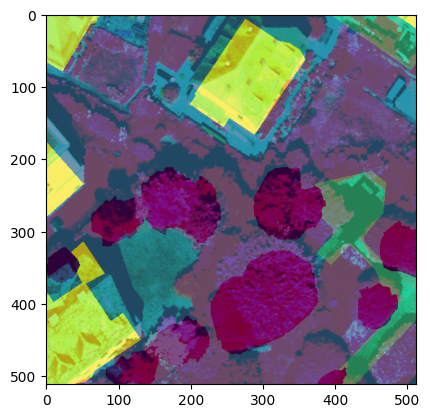

In [16]:
import numpy as np
#lese npy dateien
img = np.load("A:/STUDIUM/05_Herbstsemester25/PA2/data/aerial/training_data/img_tiles/img_006528.npy")
mask = np.load("A:/STUDIUM/05_Herbstsemester25/PA2/data/aerial/training_data/mask_tiles/mask_006528.npy")


plt.imshow(mask[:,:,0])
#lay mask over img with alpha
plt.imshow(img[:,:,0:3], alpha=0.3)
